In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Reflect Tables into SQLAlchemy ORM
#Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing databse into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session from Python to the database in order to query the database
session = Session(engine)

Exploratory Climate Analysis

In [10]:
# Display the Measurement row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x282359f1828>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [11]:
#Display the Measurement 
#all_rows = session.query(Measurement).all()
#for record in all_rows:
#    print(record.__dict__)

In [12]:
# Display the Station row's columns and data in dictionary format
first_station_row = session.query(Station).first()
first_station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x282359fb908>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [13]:
# Get the latest date from Measurement
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


In [14]:
#Get the date 12 months ago from latest date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipatation data and plot results
#for row in session.query(Measurement.date, Measurement.prcp).all():
    #print(row)
prcp_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

#for year in prcp_year:
#    print("Date: {0}, Precip: {1}".format(year.date, year.prcp))


In [16]:
# Load query results into DataFrame and set index to the date
m_df = pd.DataFrame(prcp_year, columns=['Date', 'Precip'])
m_df.set_index('Date', inplace=True)
m_df.head(20)

,Precip
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


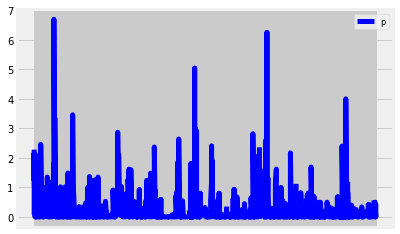

In [40]:
# Plot the dataframe as bar chart
#################################
# Get numbers to plot
dates = m_df.index.values
prec = m_df['Precip']

# Create the bar chart
plt.clf()
#m_df.plot.bar(figsize=(12,10)
plt.tick_params(axis='x', labelbottom=False)
plt.plot(dates, prec, color = 'blue', linewidth=5)
plt.legend(labels='precip', loc='upper right', fontsize='small',frameon=True)
plt.show()


In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data for 2010 thru 2017
all_prcp = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date).all()
# Create DataFrame
all_prcp_df = pd.DataFrame(all_prcp, columns=['Date', 'Precip'])
#all_prcp_df.set_index('Date', inplace=True)

#all_prcp_df.head(20)
# Display the summary statistics for preciptation data
all_prcp_df.describe()

,Precip
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [42]:
# Design a query to show total number of stations
#Display the Stations
all_stations = session.query(Station).all()
for record in all_stations:
    print(record.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000282359FB908>, 'elevation': 3.0, 'longitude': -157.8168, 'name': 'WAIKIKI 717.2, HI US', 'id': 1, 'latitude': 21.2716, 'station': 'USC00519397'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002823A19C080>, 'elevation': 14.6, 'longitude': -157.8015, 'name': 'KANEOHE 838.1, HI US', 'id': 2, 'latitude': 21.4234, 'station': 'USC00513117'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002823A192CF8>, 'elevation': 7.0, 'longitude': -157.8374, 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'id': 3, 'latitude': 21.5213, 'station': 'USC00514830'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002823A1925C0>, 'elevation': 11.9, 'longitude': -157.9751, 'name': 'PEARL CITY, HI US', 'id': 4, 'latitude': 21.3934, 'station': 'USC00517948'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002823A192550>, 'elevation': 

In [43]:
# Station Analysis
# Query to count the total number of stations

stat_count = session.query(func.count(Station.name)).all()
for record in stat_count:
    print(record)

(9,)


In [44]:
#List stations and observaton counts in descending order

active_stat = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all();
for number in active_stat:
    print(number)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [45]:
# Using the station id from the previous query, calcuate the lowest temp recorded
# the highest temp recorded and the average temp from the most active station

lo_hi = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
lo_hi

[(54.0, 85.0, 71.66378066378067)]

In [46]:
# Query for last 12 months of temperature data for most active station
# Plot the results

temp_year = session.query(Measurement.tobs).\
    filter(Measurement.date > year_ago).filter(Measurement.station == "USC00519281").all();

# Create dataframe with temperatures
temp_year_df = pd.DataFrame(temp_year, columns = ['Temp'])
temp_year_df.head()

,Temp
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


Text(0.5, 1.0, 'Temperature Histogram')

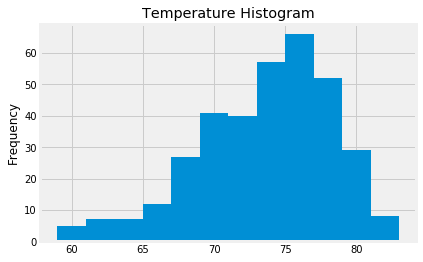

In [47]:
# Plot as histogram

plt.hist(temp_year_df['Temp'], bins = 12)
plt.ylabel('Frequency')
plt.title('Temperature Histogram')